In [1]:
!pwd

/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/test


In [2]:
%cd /home/giakhang/dev/multi_task_autopilot/YOLOF-Mask

/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask


In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets.coco_panoptic import register_coco_panoptic_separated

In [4]:
from detectron2.model_zoo import get_config
from detectron2.config import LazyConfig
from detectron2.config.instantiate import instantiate
from detectron2.engine import DefaultPredictor

cfg = LazyConfig.load("/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/configs/PanopticSegmentation/panoptic_yolof_mask_R_50_1x.py")

cfg.train.device = 'cuda:0'
cfg.dataloader.train.dataset.names = 'bdd100k_train_separated'
cfg.dataloader.test.dataset.names = 'bdd100k_val_separated'
cfg.dataloader.train.total_batch_size = 16

cfg.train.init_checkpoint = "/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/output/panoptic_yolof_mask_R_50_1x/model_final.pth"

In [5]:
STUFF_CLASSES = [
    "unlabeled", "dynamic", "ego vehicle", "ground", "static",  
    "parking", "rail track", "road", "sidewalk", "bridge", 
    "building", "fence", "garage", "guard rail", "tunnel", 
    "wall", "banner", "billboard", "lane divider", "parking sign", 
    "pole", "polegroup", "street light", "traffic cone",  
    "traffic device", "traffic light", "traffic sign",  
    "traffic sign frame", "terrain", "vegetation", "sky"
    ]

THING_CLASSES = [
    "person", "rider", "bicycle", "bus",
    "car", "caravan", "motorcycle", "trailer", "train", "truck"
    ]

MetadataCatalog.get("bdd100k_train_separated").stuff_classes = STUFF_CLASSES
MetadataCatalog.get("bdd100k_val_separated").stuff_classes = STUFF_CLASSES

MetadataCatalog.get("bdd100k_train_separated").thing_classes = THING_CLASSES
MetadataCatalog.get("bdd100k_val_separated").thing_classes = THING_CLASSES

In [6]:
from yolof_mask.engine.default_predictor import DefaultPredictor

predictor = DefaultPredictor(cfg)

[11/15 14:36:33 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/output/panoptic_yolof_mask_R_50_1x/model_final.pth ...


In [7]:
im = cv2.imread("/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/bdd100k/images/10k/test/fd866470-7cc453f1.jpg")
predictions = predictor(im)

/home/giakhang/anaconda3/envs/yolof_mask/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
segments_info

[{'id': 1,
  'isthing': True,
  'score': 0.9455317258834839,
  'category_id': 4,
  'instance_id': 0,
  'area': 3642.0},
 {'id': 2,
  'isthing': True,
  'score': 0.9363155961036682,
  'category_id': 4,
  'instance_id': 1,
  'area': 2198.0},
 {'id': 3,
  'isthing': True,
  'score': 0.9321684241294861,
  'category_id': 4,
  'instance_id': 2,
  'area': 6377.0},
 {'id': 4,
  'isthing': True,
  'score': 0.9274299144744873,
  'category_id': 4,
  'instance_id': 3,
  'area': 38365.0},
 {'id': 5,
  'isthing': True,
  'score': 0.9255629777908325,
  'category_id': 4,
  'instance_id': 4,
  'area': 60573.0},
 {'id': 6,
  'isthing': True,
  'score': 0.8851480484008789,
  'category_id': 4,
  'instance_id': 5,
  'area': 1544.0},
 {'id': 7,
  'isthing': True,
  'score': 0.8806242942810059,
  'category_id': 0,
  'instance_id': 6,
  'area': 3792.0},
 {'id': 8,
  'isthing': True,
  'score': 0.8731089234352112,
  'category_id': 0,
  'instance_id': 7,
  'area': 1369.0},
 {'id': 9,
  'isthing': True,
  'score

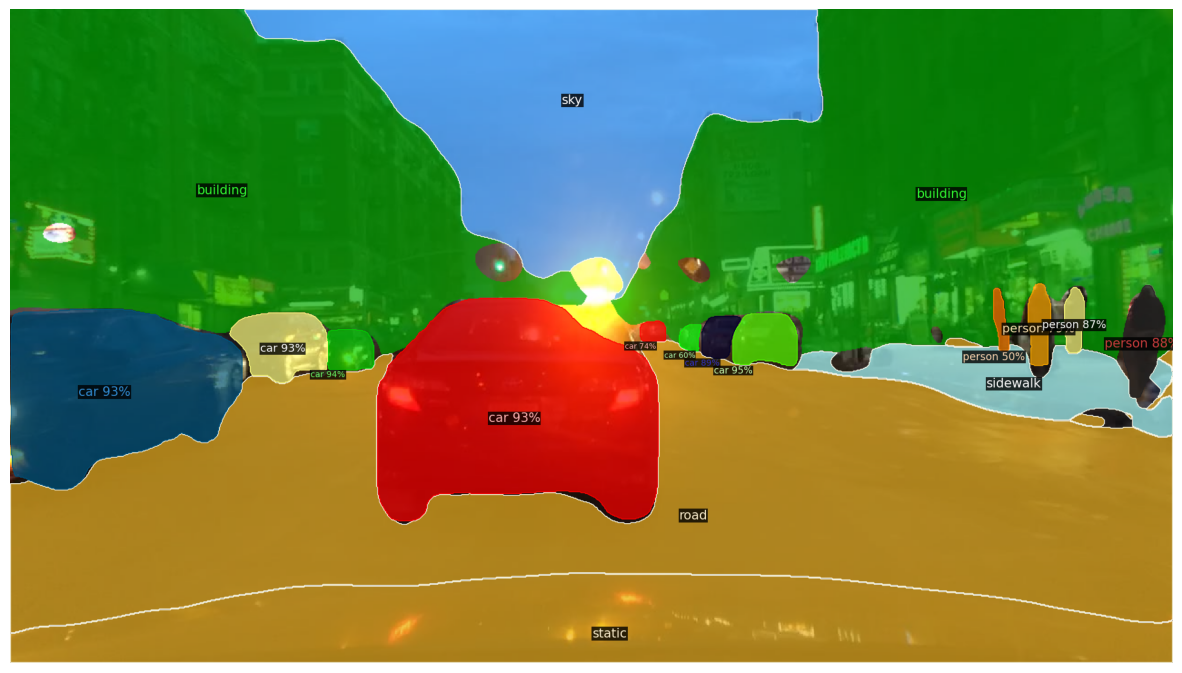

In [8]:
import matplotlib.pyplot as plt

panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.dataloader.train.dataset.names), scale=1.5)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

_ = plt.figure(figsize=(15, 17))
plt.axis('off')


plt.imshow(out.get_image())